In [1]:
import pandas as pd
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prasunamannava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prasunamannava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_ted = pd.read_csv('transcripts.csv')

In [3]:
df_ted.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  
0  https://www.ted.com/talks/ken_robinson_says_sc...  
1  https://www.ted.com/talks/al_gore_on_averting_...  
2  https://www.ted.com/talks/david_pogue_says_sim...  
3  https://www.ted.com/talks/majora_carter_s_tale...  
4  https://www.ted.com/talks/hans_rosling_shows_t...

In [4]:
df_ted.shape

(2467, 2)

In [5]:
df_ted_meta = pd.read_csv('ted_main.csv')

In [6]:
df_ted_meta.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

# Selecting transcripts greater than 100 words

In [7]:
res = len(df_ted['transcript'][0].split())
print(res)

3066


In [8]:
count_speech = []
for speech in df_ted['transcript']:
    res = len(speech.split())
    count_speech.append(res)

df_ted ['count_speech'] = count_speech   

In [9]:
df_ted.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  count_speech  
0  https://www.ted.com/talks/ken_robinson_says_sc...          3066  
1  https://www.ted.com/talks/al_gore_on_averting_...          2089  
2  https://www.ted.com/talks/david_pogue_says_sim...          3253  
3  https://www.ted.com/talks/majora_carter_s_tale...          3015  
4  https://www.ted.com/talks/hans_rosling_shows_t...          3121

In [10]:
df_ted['transcript'][0]

'Good morning. How are you?(Laughter)It\'s been great, hasn\'t it? I\'ve been blown away by the whole thing. In fact, I\'m leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we\'ve had and in all of the people here. Just the variety of it and the range of it. The second is that it\'s put us in a place where we have no idea what\'s going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don\'t you? I find this very interesting. If you\'re at a dinner party, and you say you work in education — Actually, you\'re not often at dinner parties, frankly.(Laughter)If you work in education, you\'re not asked.(Laughter)And you\'re never asked back, curiously. That\'s strange to me. But if you are, and you say to somebody, you

In [11]:
df_ted_final = df_ted[df_ted['count_speech'] >= 100]

In [12]:
df_ted_final.shape

(2456, 3)

In [13]:
ted_merged = pd.merge(df_ted, df_ted_meta, on="url")

In [14]:
ted_merged.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  count_speech  comments  \
0  https://www.ted.com/talks/ken_robinson_says_sc...          3066      4553   
1  https://www.ted.com/talks/al_gore_on_averting_...          2089       265   
2  https://www.ted.com/talks/david_pogue_says_sim...          3253       124   
3  https://www.ted.com/talks/majora_carter_s_tale...          3015       200   
4  https://www.ted.com/talks/hans_rosling_shows_t...          3121       593   

                                         description  duration    event  \
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
1  With the same humor and humanity he exuded in ...       977  TED2006   
2  New York Times columnist David Pogue takes aim...      1286  TED2006   
3  In an emotionally charged talk, MacArthur-winn...      1116  TED2006   
4  You've never seen data presented like this. Wi...      1190  TED2006   

    film_date  languages   main_speaker  \
0  1140825600         60   Ken Robinson   
1  1140825600         43        Al Gore   
2  1140739200         26    David Pogue   
3  1140912000         35  Majora Carter   
4  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title     views  
0      Do schools kill creativity?  47227110  
1      Averting the climate crisis   3200520  
2                 Simplicity sells   1636292  
3              Greening the ghetto   1697550  
4  The best stats you've ever seen  12005869

In [15]:
ted_merged['published_date'] = pd.to_datetime(ted_merged['published_date'],unit='s')


## Looking into outliers

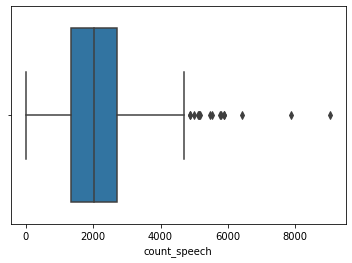

In [16]:
sns.boxplot(x = ted_merged['count_speech']);

In [17]:
ted_merged = ted_merged[ted_merged['count_speech'] <= 6000] # 3 talks dropped

In [18]:
ted_transcript = ted_merged[['transcript', 'views', 'url']]
%store ted_transcript

Stored 'ted_transcript' (DataFrame)


In [19]:
transcript = ted_transcript[['transcript', 'views']]
transcript.head()

transcript     views
0  Good morning. How are you?(Laughter)It's been ...  47227110
1  Thank you so much, Chris. And it's truly a gre...   3200520
2  (Music: "The Sound of Silence," Simon & Garfun...   1636292
3  If you're here today — and I'm very happy that...   1697550
4  About 10 years ago, I took on the task to teac...  12005869

## Preprocess text

In [20]:
def processing_transcript(transcript):
    transcript = transcript.lower()
    
    tokenizer = RegexpTokenizer(r'(?u)\b[A-Za-z]+\b')
    tokens = tokenizer.tokenize(transcript)
    
    new_stopwords =["people", "know", "thing", "going","right","applause", "music", "every","Something", "think", "called", "actually", "little", "really", "first"]
    #stopword_list = stopwords.words('english')
    #stopwords_removed = [word for word in tokens if not word in stopword_list]
    stpwrd = nltk.corpus.stopwords.words('english')
    stpwrd.extend(new_stopwords)
    stopwords_removed = [word for word in tokens if not word in stpwrd]
    
    text = " ".join(stopwords_removed)
    
    lemmatizer = WordNetLemmatizer() 
    lemmed = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    stemmer = PorterStemmer()
    stemmed = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return lemmed

In [21]:
ted_transcript['preprocessed'] = transcript.transcript.apply(lambda x: processing_transcript(x))


<ipython-input-21-c8016e2e7766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ted_transcript['preprocessed'] = transcript.transcript.apply(lambda x: processing_transcript(x))


In [22]:
ted_transcript.head()

transcript     views  \
0  Good morning. How are you?(Laughter)It's been ...  47227110   
1  Thank you so much, Chris. And it's truly a gre...   3200520   
2  (Music: "The Sound of Silence," Simon & Garfun...   1636292   
3  If you're here today — and I'm very happy that...   1697550   
4  About 10 years ago, I took on the task to teac...  12005869   

                                                 url  \
0  https://www.ted.com/talks/ken_robinson_says_sc...   
1  https://www.ted.com/talks/al_gore_on_averting_...   
2  https://www.ted.com/talks/david_pogue_says_sim...   
3  https://www.ted.com/talks/majora_carter_s_tale...   
4  https://www.ted.com/talks/hans_rosling_shows_t...   

                                        preprocessed  
0  good morning laughter great blown away whole f...  
1  thank much chris truly great honor opportunity...  
2  sound silence simon garfunkel hello voice mail...  
3  today happy heard sustainable development save...  
4  year ago took task teach global development sw...

In [23]:
count_speech = []
for speech in ted_transcript['preprocessed']:
    res = len(speech.split())
    count_speech.append(res)

ted_transcript ['count_speech'] = count_speech

<ipython-input-23-844aa72f709d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ted_transcript ['count_speech'] = count_speech


In [24]:
ted_transcript = ted_transcript[ted_transcript['count_speech'] >= 100]

In [25]:
ted_transcript = ted_transcript.drop(columns = 'count_speech')

In [26]:
%store ted_transcript

Stored 'ted_transcript' (DataFrame)


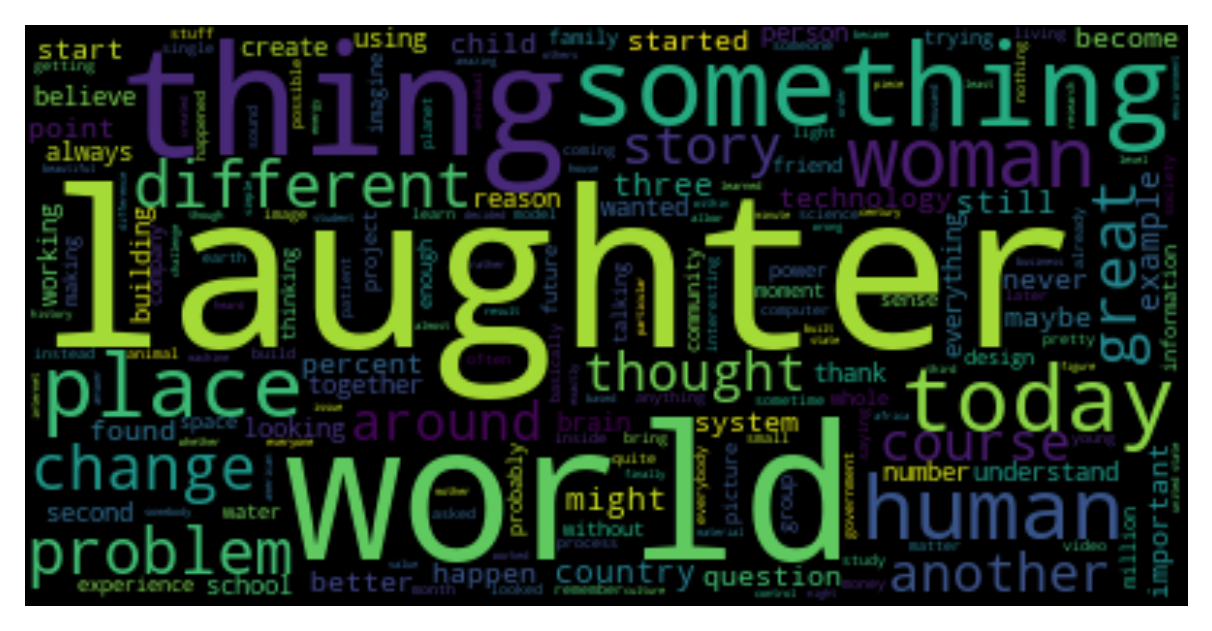

In [27]:
import nltk
from nltk.corpus import stopwords
stopwords = set(STOPWORDS)
#stopwords.update(["people", "know", "thing", "going","right", "every","Something", "think", "called", "actually", "little", "really", "first"])
text = " ".join(review for review in ted_transcript.preprocessed)
wordcloud = WordCloud(stopwords=stopwords,collocations = True, min_word_length=5 ).generate(text)
plt.figure(dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

## Vectorize

In [28]:
tfidf = TfidfVectorizer(max_df = 0.90, min_df=2,)

In [29]:
word_vector = tfidf.fit_transform(ted_transcript['preprocessed'])

In [30]:
vector_df = pd.DataFrame(word_vector.toarray(), columns = tfidf.get_feature_names()).head(20)

In [31]:
vector_df.head()

aa  aaa  aaaa  aaaaa  aaaaaah  aaaah  aah  aaron   ab  ababa  ...  \
0  0.0  0.0   0.0    0.0      0.0    0.0  0.0    0.0  0.0    0.0  ...   
1  0.0  0.0   0.0    0.0      0.0    0.0  0.0    0.0  0.0    0.0  ...   
2  0.0  0.0   0.0    0.0      0.0    0.0  0.0    0.0  0.0    0.0  ...   
3  0.0  0.0   0.0    0.0      0.0    0.0  0.0    0.0  0.0    0.0  ...   
4  0.0  0.0   0.0    0.0      0.0    0.0  0.0    0.0  0.0    0.0  ...   

   zooming  zoonotic  zoop  zooplankton  zopa  zuccotti  zuckerberg  \
0      0.0       0.0   0.0          0.0   0.0       0.0         0.0   
1      0.0       0.0   0.0          0.0   0.0       0.0         0.0   
2      0.0       0.0   0.0          0.0   0.0       0.0         0.0   
3      0.0       0.0   0.0          0.0   0.0       0.0         0.0   
4      0.0       0.0   0.0          0.0   0.0       0.0         0.0   

   zuckerman  zulu  zurich  
0        0.0   0.0     0.0  
1        0.0   0.0     0.0  
2        0.0   0.0     0.0  
3        0.0   0.0     0.0  
4        0.0   0.0     0.0  

[5 rows x 28629 columns]

In [32]:
nmf = NMF(n_components=25, random_state=42)


In [33]:
nmf_fit = nmf.fit(word_vector)


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [34]:
model_names={}
def display_topics_names(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        value = ", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
        model_names[f'topic {ix}'] = value
    return model_names

In [35]:
display_topics_names(nmf, tfidf.get_feature_names(), 25) 

{'topic 0': 'laughter, said, get, got, go, say, guy, thing, want, would, back, something, see, oh, went, day, yeah, well, look, lot, ok, kind, good, put, come',
 'topic 1': 'life, love, story, compassion, feel, god, would, human, self, world, way, experience, say, fear, happiness, word, mind, religion, book, death, never, want, feeling, could, moment',
 'topic 2': 'company, business, money, dollar, market, percent, value, work, social, product, economy, need, government, problem, innovation, cost, get, economic, make, financial, service, want, organization, pay, job',
 'topic 3': 'patient, health, doctor, care, medical, disease, hospital, drug, surgery, medicine, treatment, physician, healthcare, heart, hiv, nurse, clinic, need, problem, illness, surgeon, community, pain, trial, system',
 'topic 4': 'ocean, coral, fish, sea, animal, shark, water, reef, whale, marine, specie, ice, underwater, see, island, deep, fishery, boat, fishing, foot, light, tuna, area, surface, place',
 'topic 5'

In [97]:
new_key = ['Comedy', 'Religion', 'Economy','Healthcare', 'MarineLife', 'Family', 'Urban_Civilization', 'Robotics', 'Neurology', 'Education', 'Inequality', 'Energy', 'IT', 'Politics', 'Architecture', 'Genetics', 'Cancer', 'Network','Gaming','NASA', 'Environment', 'Space', 'Transplant', 'Music', 'HealthInNations']
#old_key = ['topic 0', 'topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9','topic 10','topic 11','topic 12','topic 13','topic 14','topic 15','topic 16','topic 17','topic 18','topic 19','topic 20','topic 21','topic 22','topic 23','topic 24']

final_dict = dict(zip(new_key, list(model_names.values())))

In [98]:
final_dict

{'Comedy': 'laughter, said, get, got, go, say, guy, thing, want, would, back, something, see, oh, went, day, yeah, well, look, lot, ok, kind, good, put, come',
 'Religion': 'life, love, story, compassion, feel, god, would, human, self, world, way, experience, say, fear, happiness, word, mind, religion, book, death, never, want, feeling, could, moment',
 'Economy': 'company, business, money, dollar, market, percent, value, work, social, product, economy, need, government, problem, innovation, cost, get, economic, make, financial, service, want, organization, pay, job',
 'Healthcare': 'patient, health, doctor, care, medical, disease, hospital, drug, surgery, medicine, treatment, physician, healthcare, heart, hiv, nurse, clinic, need, problem, illness, surgeon, community, pain, trial, system',
 'MarineLife': 'ocean, coral, fish, sea, animal, shark, water, reef, whale, marine, specie, ice, underwater, see, island, deep, fishery, boat, fishing, foot, light, tuna, area, surface, place',
 'Fa

In [99]:
Topic_final = pd.DataFrame.from_dict(final_dict, orient='index')

In [100]:
columns_names = [ 'Topic_words']

In [101]:
Topic_final.columns = columns_names

In [102]:
Topic_final.shape

(25, 1)

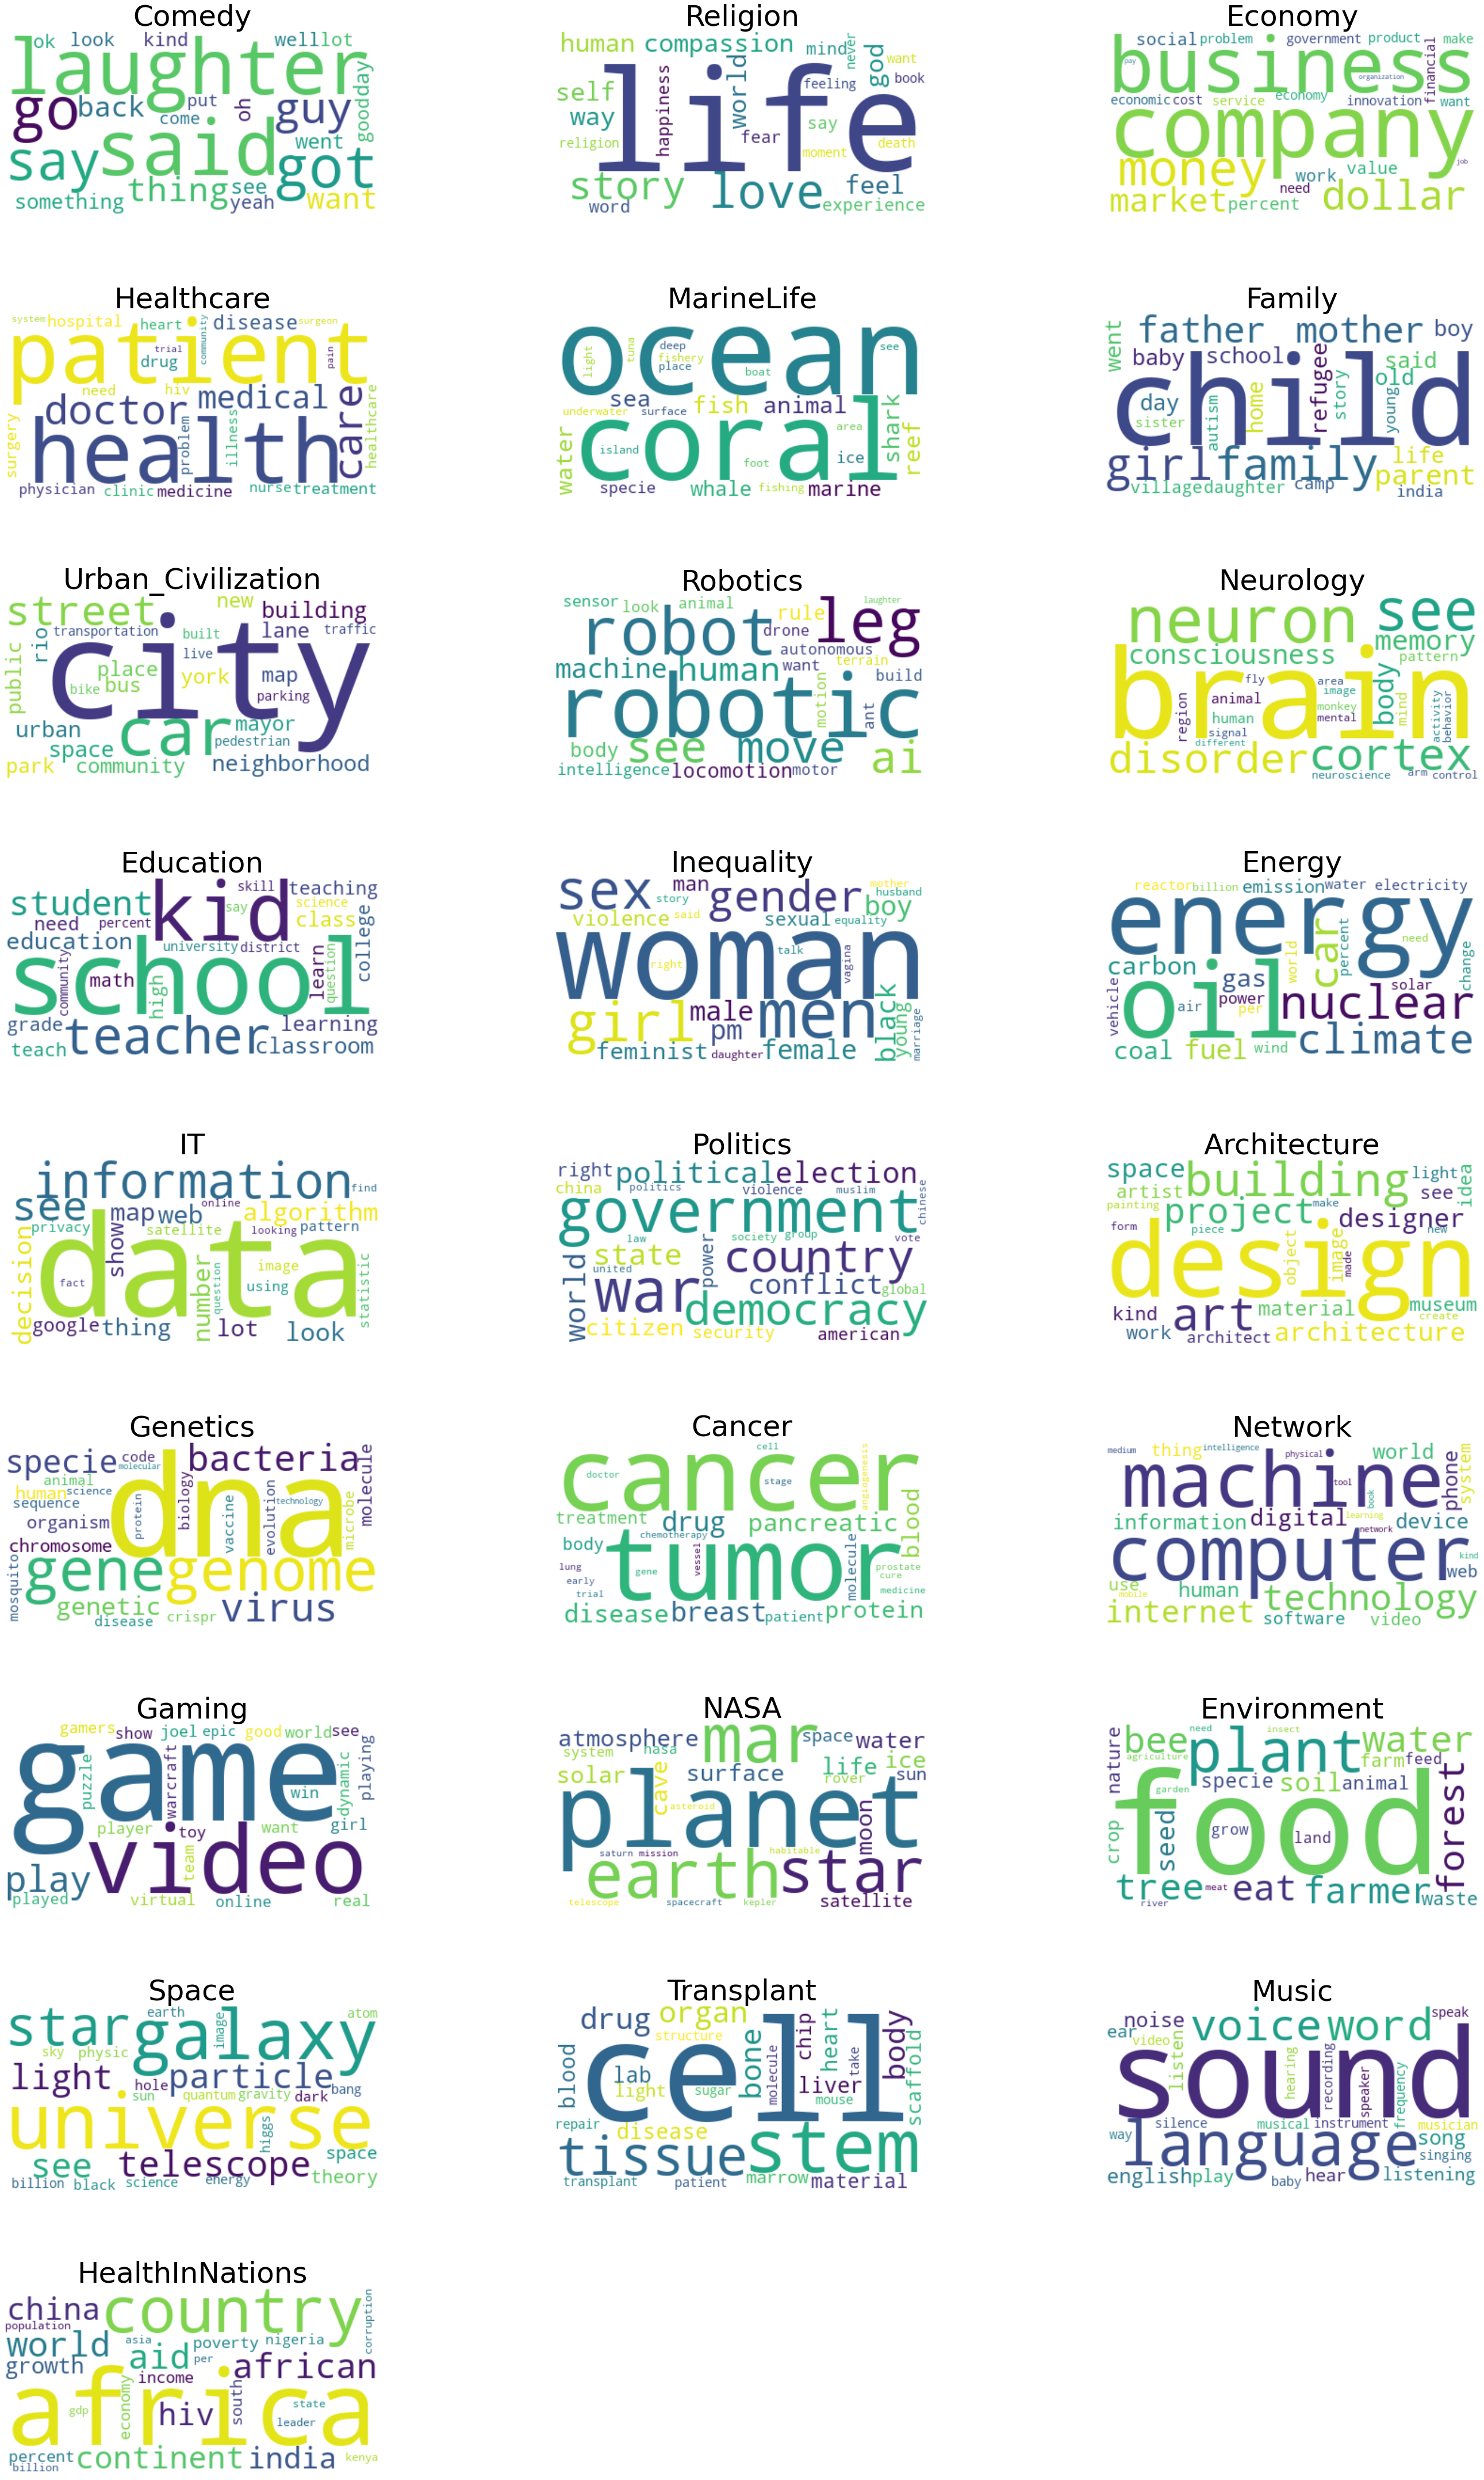

In [103]:
wc = WordCloud(background_color="white", colormap="viridis", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [40, 60]

# Create subplots for each topic
for i in range(25):

    wc.generate(text=Topic_final["Topic_words"][i])
    
    plt.tight_layout()

    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace=.5)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(Topic_final.index[i], size=50)
    
plt.show()

## Creating a dataframe for modeling

In [104]:
talk_topics = nmf.transform(word_vector)

talk_topics_df = pd.DataFrame(talk_topics).add_prefix('topic_')
talk_topics_df['TalkTranscript'] = transcript['transcript']
talk_topics_df['Views'] = transcript['views']

talk_topics_df.dropna(inplace=True)

In [105]:
talk_topics_df.head()

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5  topic_6  \
0  0.082460  0.012796  0.000000  0.000000  0.000000  0.034273  0.00000   
1  0.064239  0.000000  0.025819  0.000000  0.000505  0.001593  0.01136   
2  0.087759  0.000000  0.033679  0.000000  0.000000  0.000000  0.00000   
3  0.008938  0.002402  0.043215  0.011166  0.000000  0.006954  0.13215   
4  0.006039  0.000000  0.000000  0.007927  0.000000  0.034207  0.00000   

    topic_7   topic_8   topic_9  ...  topic_17  topic_18  topic_19  topic_20  \
0  0.000000  0.015973  0.095409  ...  0.000000  0.001356  0.017919  0.003588   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.005992   
2  0.000000  0.000000  0.000000  ...  0.071777  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.018994  ...  0.000000  0.000000  0.000000  0.064382   
4  0.000602  0.000000  0.009043  ...  0.000000  0.000000  0.000000  0.000000   

   topic_21  topic_22  topic_23  topic_24  \
0       0.0  0.000000  0.005558  0.003898   
1       0.0  0.000000  0.008001  0.006412   
2       0.0  0.007233  0.045748  0.000000   
3       0.0  0.000000  0.000000  0.011473   
4       0.0  0.000000  0.000000  0.317784   

                                      TalkTranscript       Views  
0  Good morning. How are you?(Laughter)It's been ...  47227110.0  
1  Thank you so much, Chris. And it's truly a gre...   3200520.0  
2  (Music: "The Sound of Silence," Simon & Garfun...   1636292.0  
3  If you're here today — and I'm very happy that...   1697550.0  
4  About 10 years ago, I took on the task to teac...  12005869.0  

[5 rows x 27 columns]

In [107]:
#topic_names = {'topic_0': 'Human_Psychology', 'topic_1': 'Family', 'topic_2':'Comedy','topic_3': 'Healthcare', 'topic_4': 'Music','topic_5': 'Environment', 'topic_6': 'World_Politics', 'topic_7': 'Urban_Civilization', 'topic_8': 'Robotics', 'topic_9': 'Neurology', 'topic_10': 'Education', 'topic_11': 'Gender_Inequality', 'topic_12': 'Energy_Sources', 'topic_13': 'IT', 'topic_14': 'Economy', 'topic_15':'Genetics', 'topic_16': 'Health_Developing_Nations', 'topic_17': 'Cancer', 'topic_18': 'Architecture', 'topic_19': 'Farming', 'topic_20': 'NASA', 'topic_21': 'Ocean', 'topic_22': 'Universe', 'topic_23': 'Gaming', 'topic_24': 'Organ_Transplant'}
new_key = ['Comedy', 'Religion', 'Economy','Healthcare', 'MarineLife', 'Family', 'Urban_Civilization', 'Robotics', 'Neurology', 'Education', 'Inequality', 'Energy', 'IT', 'Politics', 'Architecture', 'Genetics', 'Cancer', 'Network','Gaming','NASA', 'Environment', 'Space', 'Transplant', 'Music', 'HealthInNations','TalkTranscript','Views']
talk_topics_df.columns = new_key
#talk_topics_df.rename(columns = topic_names, inplace = True)


In [108]:
%store talk_topics_df

Stored 'talk_topics_df' (DataFrame)


## Mapping topics to talk transcripts

In [47]:
topic_values = nmf.transform(word_vector)
ted_transcript['Topic'] = topic_values.argmax(axis=1)
ted_transcript.head()

transcript     views  \
0  Good morning. How are you?(Laughter)It's been ...  47227110   
1  Thank you so much, Chris. And it's truly a gre...   3200520   
2  (Music: "The Sound of Silence," Simon & Garfun...   1636292   
3  If you're here today — and I'm very happy that...   1697550   
4  About 10 years ago, I took on the task to teac...  12005869   

                                                 url  \
0  https://www.ted.com/talks/ken_robinson_says_sc...   
1  https://www.ted.com/talks/al_gore_on_averting_...   
2  https://www.ted.com/talks/david_pogue_says_sim...   
3  https://www.ted.com/talks/majora_carter_s_tale...   
4  https://www.ted.com/talks/hans_rosling_shows_t...   

                                        preprocessed  Topic  
0  good morning laughter great blown away whole f...      9  
1  thank much chris truly great honor opportunity...     11  
2  sound silence simon garfunkel hello voice mail...      0  
3  today happy heard sustainable development save...      6  
4  year ago took task teach global development sw...     24

In [48]:
topic_names_numbers = [[0,'Human_Psychology'],[ 1, 'Family'],[ 2,'Comedy'],[3,'Healthcare'], [4, 'Music'],[5,'Environment'], [6, 'World_Politics'], [7, 'Urban_Civilization'], [8, 'Robotics'],[ 9, 'Neurology'], [10, 'Education'], [11, 'Gender_Inequality'],[ 12, 'Energy_Sources'], [13, 'IT'], [14, 'Economy'], [15,'Genetics'], [16, 'Healthcare_In_Developing_Nations'],[17, 'Cancer'], [18, 'Architecture'], [19, 'Farming'], [20, 'NASA'],[ 21, 'Ocean'], [22, 'Universe'], [23, 'Gaming'], [24, 'Organ_Transplant']]
topic_names_numb = pd.DataFrame(topic_names_numbers, columns = ['Topic', 'Topic_Name_TopicModeling'])

In [49]:
ted_topics_merged = pd.merge(ted_transcript, topic_names_numb, on="Topic")
ted_topics_merged.head()

transcript     views  \
0  Good morning. How are you?(Laughter)It's been ...  47227110   
1  I've been at MIT for 44 years. I went to TED I...    358304   
2  A fact came out of MIT, couple of years ago. K...    882034   
3  Welcome to "Five Dangerous Things You Should L...   4364865   
4  It's a great honor to be here with you. The go...    611092   

                                                 url  \
0  https://www.ted.com/talks/ken_robinson_says_sc...   
1  https://www.ted.com/talks/nicholas_negroponte_...   
2  https://www.ted.com/talks/phil_borges_on_endan...   
3  https://www.ted.com/talks/gever_tulley_on_5_da...   
4  https://www.ted.com/talks/bill_strickland_make...   

                                        preprocessed  Topic  \
0  good morning laughter great blown away whole f...      9   
1  mit year went ted one person ted went ricky re...      9   
2  fact came mit couple year ago ken hale linguis...      9   
3  welcome five dangerous thing let child child b...      9   
4  great honor good news aware responsibility get...      9   

  Topic_Name_TopicModeling  
0                Neurology  
1                Neurology  
2                Neurology  
3                Neurology  
4                Neurology

## Merging dataframes for Tableau Analysis

In [50]:
ted_topics_years = pd.merge(ted_topics_merged, ted_merged, on="url")
ted_topics_years.head()

transcript_x   views_x  \
0  Good morning. How are you?(Laughter)It's been ...  47227110   
1  I've been at MIT for 44 years. I went to TED I...    358304   
2  A fact came out of MIT, couple of years ago. K...    882034   
3  Welcome to "Five Dangerous Things You Should L...   4364865   
4  It's a great honor to be here with you. The go...    611092   

                                                 url  \
0  https://www.ted.com/talks/ken_robinson_says_sc...   
1  https://www.ted.com/talks/nicholas_negroponte_...   
2  https://www.ted.com/talks/phil_borges_on_endan...   
3  https://www.ted.com/talks/gever_tulley_on_5_da...   
4  https://www.ted.com/talks/bill_strickland_make...   

                                        preprocessed  Topic  \
0  good morning laughter great blown away whole f...      9   
1  mit year went ted one person ted went ricky re...      9   
2  fact came mit couple year ago ken hale linguis...      9   
3  welcome five dangerous thing let child child b...      9   
4  great honor good news aware responsibility get...      9   

  Topic_Name_TopicModeling                                       transcript_y  \
0                Neurology  Good morning. How are you?(Laughter)It's been ...   
1                Neurology  I've been at MIT for 44 years. I went to TED I...   
2                Neurology  A fact came out of MIT, couple of years ago. K...   
3                Neurology  Welcome to "Five Dangerous Things You Should L...   
4                Neurology  It's a great honor to be here with you. The go...   

   count_speech  comments                                        description  \
0          3066      4553  Sir Ken Robinson makes an entertaining and pro...   
1          2825        99  Nicholas Negroponte, founder of the MIT Media ...   
2          2306        59  Photographer Phil Borges shows rarely seen ima...   
3          1287       435  At TED U, Gever Tulley, founder of the Tinkeri...   
4          5480        95  Bill Strickland tells a quiet and astonishing ...   

   ...         main_speaker  \
0  ...         Ken Robinson   
1  ...  Nicholas Negroponte   
2  ...          Phil Borges   
3  ...         Gever Tulley   
4  ...      Bill Strickland   

                                                name  num_speaker  \
0          Ken Robinson: Do schools kill creativity?            1   
1          Nicholas Negroponte: One Laptop per Child            1   
2         Phil Borges: Photos of endangered cultures            1   
3  Gever Tulley: 5 dangerous things you should le...            1   
4  Bill Strickland: Rebuilding a neighborhood wit...            1   

       published_date                                            ratings  \
0 2006-06-27 00:11:00  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1 2006-08-01 00:11:00  [{'id': 3, 'name': 'Courageous', 'count': 83},...   
2 2007-01-09 00:11:00  [{'id': 1, 'name': 'Beautiful', 'count': 126},...   
3 2007-12-21 01:27:00  [{'id': 10, 'name': 'Inspiring', 'count': 1035...   
4 2008-01-20 23:05:00  [{'id': 23, 'name': 'Jaw-dropping', 'count': 1...   

                                       related_talks  speaker_occupation  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...     Author/educator   
1  [{'id': 2043, 'hero': 'https://pe.tedcdn.com/i...      Tech visionary   
2  [{'id': 2264, 'hero': 'https://pe.tedcdn.com/i...        Photographer   
3  [{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...            Tinkerer   
4  [{'id': 53, 'hero': 'https://pe.tedcdn.com/ima...    Social innovator   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['children', 'design', 'education', 'entrepren...   
2  ['activism', 'art', 'culture', 'design', 'film...   
3  ['children', 'design', 'entertainment', 'paren...   
4  ['MacArthur grant', 'activism', 'children', 'c...   

                                               title   views_y  
0                        Do schools kill 

In [51]:
ted_topics_years.to_csv ('ted_topics_years.csv')


# Sentiment Analysis

In [52]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

In [53]:
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

In [54]:
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    #df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
    #df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))
    return df

In [55]:
text_sentiment = get_sentiment_scores(ted_topics_merged,'preprocessed')

display(text_sentiment.sample(5))

transcript    views  \
1492  Pat Mitchell: You have brought us images from ...   498409   
2159  The future of life, where the unraveling of ou...   497449   
1608  First, a video. Yes, it is a scrambled egg. Bu...  7481004   
390   Today I wanted to — well, this morning — I wan...  1587546   
1533  As an Arab female photographer, I have always ...   818556   

                                                    url  \
1492  https://www.ted.com/talks/nadia_al_sakkaf_see_...   
2159  https://www.ted.com/talks/gregory_stock_to_upg...   
1608  https://www.ted.com/talks/david_christian_big_...   
390   https://www.ted.com/talks/travis_kalanick_uber...   
1533  https://www.ted.com/talks/laura_boushnak_for_t...   

                                           preprocessed  Topic  \
1492  pat mitchell brought u image yemen time take u...     10   
2159  future life unraveling biology bring light bit...     15   
1608  video yes scrambled egg look hope begin feel s...     21   
390   today wanted well morning want talk future hum...      6   
1533  arab female photographer always found ample in...     10   

     Topic_Name_TopicModeling  preprocessed Positive Sentiment Score  \
1492                Education                                  0.219   
2159                 Genetics                                  0.204   
1608                    Ocean                                  0.199   
390            World_Politics                                  0.232   
1533                Education                                  0.185   

      preprocessed Negative Sentiment Score  
1492                                  0.092  
2159                                  0.100  
1608                                  0.071  
390                                   0.062  
1533                                  0.065

In [56]:
def print_top_n_reviews(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Transcript: {row[3]}")

In [57]:
print_top_n_reviews(text_sentiment,'preprocessed Positive Sentiment Score',5)


Score: 0.482, Transcript: want discus afternoon fail great career laughter economist dismal end day ready dismal remark want talk want great career already decided want good career fail laughter goodness cheery failing laughter canadian group undoubtedly laughter trying good career fail good job disappearing great job great career high workload high stress bloodsucking soul destroying kind job practically nothing looking good job fail want talk looking great job great career fail reason matter many time tell want great career pursue passion pursue dream pursue greatest fascination life hear decide matter many time download steven j stanford commencement address still look decide quite sure decide lazy hard afraid look passion find feel like idiot make excuse look passion excuse lady gentleman go whole long list creativity thinking excuse need want great career example one great excuse sigh well great career truly matter luck stand around try lucky lucky great career good career good ca

In [58]:
print_top_n_reviews(text_sentiment,'preprocessed Negative Sentiment Score',5)


Score: 0.403, Transcript: everyone familiar cancer normally cancer contagious disease tasmanian devil shown u cancer contagious disease also threaten entire specie extinction tasmanian devil many might familiar taz cartoon character one spin around around around many real animal tasmanian devil world largest carnivorous marsupial marsupial mammal pouch like kangaroo tasmanian devil got name terrifying nocturnal scream make screaming laughter tasmanian devil predominantly scavenger us powerful jaw sharp teeth chomp bone rotting dead animal tasmanian devil found island tasmania small island south mainland australia despite ferocious appearance tasmanian devil quite adorable animal fact growing tasmania always incredibly exciting got chance see tasmanian devil wild tasmanian devil population undergoing extremely fast decline fact concern specie could go extinct wild within year reason emergence new disease contagious cancer story begin wildlife photographer took photograph tasmanian devil

In [141]:
def plot_wordcloud(series,output_filename='wordcloud'):
    wordcloud = WordCloud(min_word_length=5, background_color='white', width=500, height=300).generate(' '.join(series.astype(str)))
    #wordcloud.to_file(output_filename + '.png')
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.axis("off")



In [142]:
def plot_wordcloud_top_n(df,number_of_reviews,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_reviews,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)

## Word Clouds with Positive Words

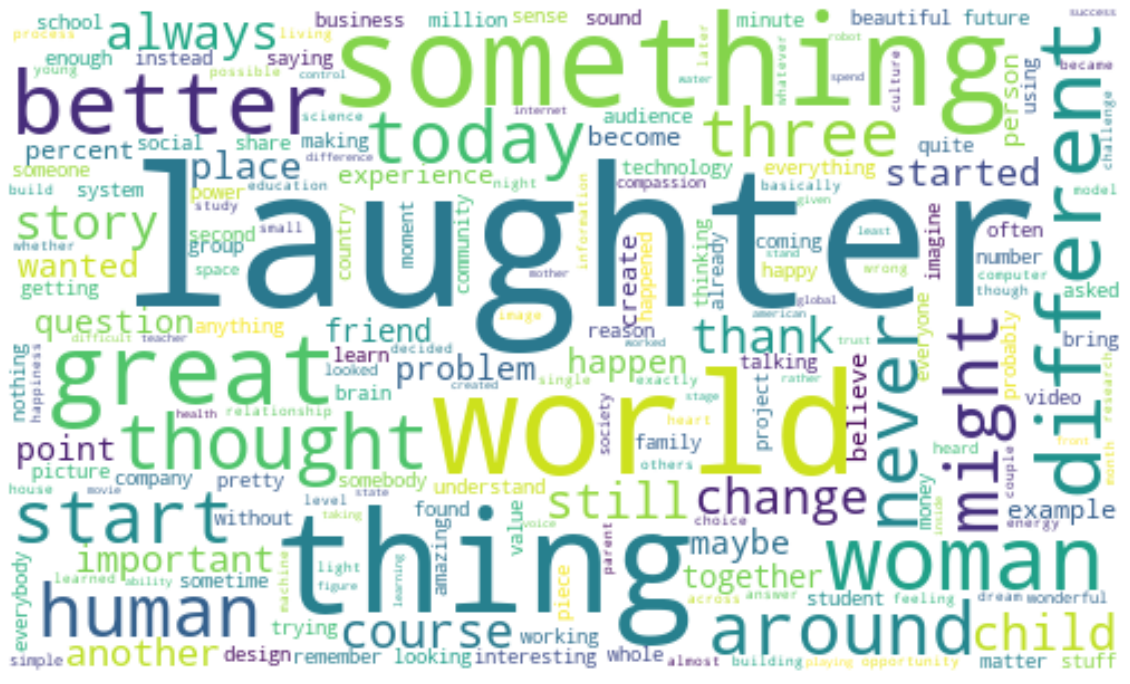

In [143]:
plot_wordcloud_top_n(text_sentiment,500,'preprocessed Positive Sentiment Score','preprocessed','positive-wordcloud')

## Word Clouds with Negative Words

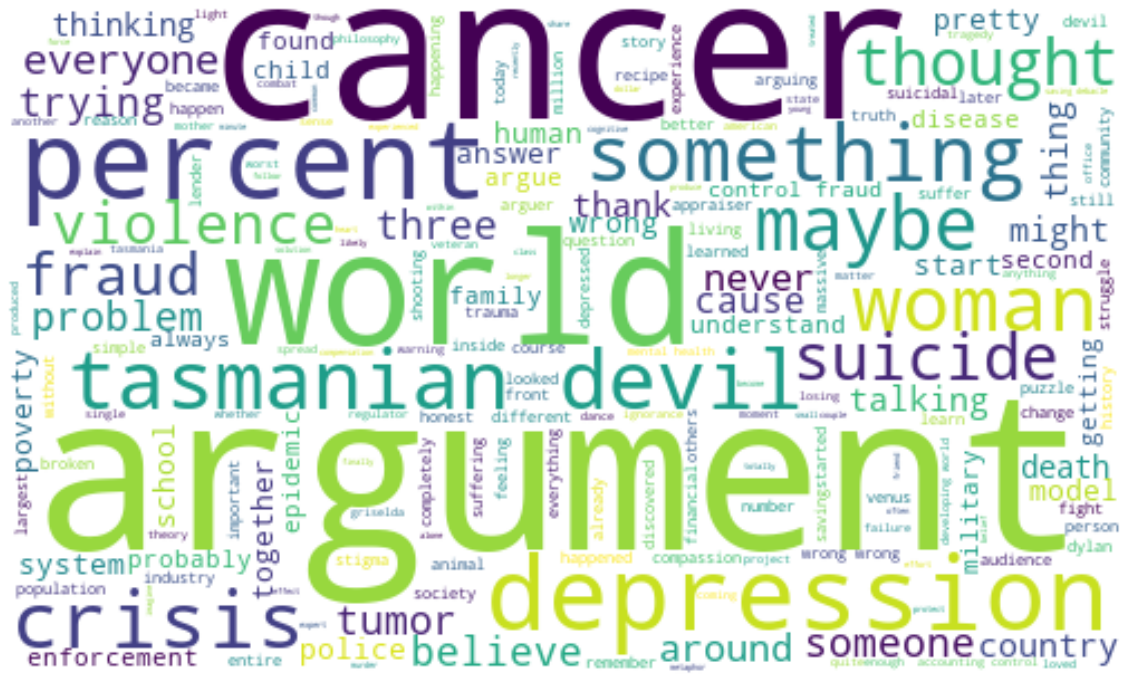

In [146]:
plot_wordcloud_top_n(text_sentiment,10,'preprocessed Negative Sentiment Score','preprocessed','Negative-wordcloud')
